# Laboratório 1 – Projeto Buscas

## Tarefa 2.1 - Grid Search

**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial – CMC-15**

**Professores:** 

Paulo André Castro

Paulo Marcelo Tasinaffo

**Alunos:**

Álvaro Tedeschi Neto

Davi Muniz de Vasconcelos

Gabriel Henrique Gobi

Thiago Lopes de Araujo

---

In [2]:
# Import de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import heapq
from math import inf, sqrt

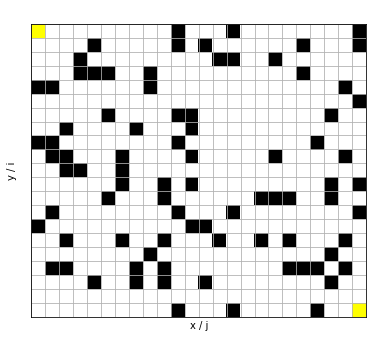

In [4]:
# Representando o grid como uma matriz de 0's e 1's com 1's representando obstáculos

grid = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
                [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
                [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

grid = np.copy(grid)
grid[0, 0] = 2 # start
grid[20, 23] = 2 # goal
newcolors = np.array([[1, 1, 1, 1],
                      [0, 0, 0, 1],
                      [1, 1, 0, 1]])
newcmp = ListedColormap(newcolors)
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(grid, cmap=newcmp)
ax.set_xlim([-0.5, 23.5])
ax.xaxis.set_ticks(np.arange(-0.5, 24.5, 1))
ax.xaxis.set_ticklabels([' ']*25)
ax.set_xlabel('x / j')
ax.set_ylim([20.5, -0.5])
ax.yaxis.set_ticks(np.arange(-0.5, 21.5, 1))
ax.yaxis.set_ticklabels([' ']*22)
ax.set_ylabel('y / i')
ax.tick_params(top = False, left = False, bottom = False)
ax.grid()

Modelando como um problema de busca na matriz acima, podemos formular como:

- **Estados**: posições $(j, i)$ , com $0 \leq j \leq 23$ e $0 \leq i \leq 20$

- **Operadores**:\
$(j, i) \rightarrow (j, i+1)$ (Norte)                 
$(j, i) \rightarrow (j, i-1)$ (Sul)\
$(j, i) \rightarrow (j+1, i)$ (Leste)\
$(j, i) \rightarrow (j-1, i)$ (Oeste)

- **Teste do objetivo**: atingir a posição (20, 23)
                  
- **Custo da trajetória**: 1 por movimento

Agora vamos escrever estruturas de dados para a implementação do grafo de busca:

In [8]:
class Node():
    """
    Nó para representar um estado da árvore de busca no grid.
    """
    def __init__(self, j=0, i=0):
        """
        Cria um nó para um estado da árvore de busca no grid.

        :param i: linha do nó no grid.
        :type i: int.
        :param j: coluna do nó no grid.
        :type j: int.
        """
        self.i = i
        self.j = j
        self.f = inf
        self.g = inf
        self.parent = None

    def get_position(self):
        """
        Retorna a posição do nó no grid de ocupação.

        :return: (j, i), coluna e linha, respectivamente.
        :rtype: 2D int tuple.
        """
        return self.j, self.i
       
    def __lt__(self, another_node):
        """
        Operador de comparação para ordenação na priority queue.
        """
        if self.i > another_node.i:
            return True
        if self.j > another_node.j:
            return True
        return False

In [9]:
start_position = (0, 0)
goal_position = (20, 23)

In [20]:
def a_star(grid, start_position, goal_position):
        """
        Algoritmo A*.

        :param start_position: posição inicial do grid (j, i).
        :type start_position: tuple.
        :param goal_position: posição objetivo do grid (j, i).
        :type goal_position: tuple.
        :return: array de nós representando o caminho encontrado pela busca e o custo.
        :rtype: array de Node's e float.
        """
        
        pq = []  # lista vazia para a priority queue
        visited = np.copy(grid)
        
        start = Node(*start_position)  # start Node
        goal = Node(*goal_position)  # goal Node
        
        
        j, i = start.get_position()
        visited[i, j] = 1
        print(visited)
        
        start.g = 0
        start.f = manhattan_dist(start, goal)
        
        heapq.heappush(pq, (start.f, start))
        
        count = 0
        
        while pq:
    
            cost, node = heapq.heappop(pq)
            j, i = node.get_position()
            visited[i, j] = 1
            
            if (j, i) == goal_position:
                print('FIM')
                
            for dj, di in [(0, +1), (0, -1), (+1, 0), (-1, 0)]:
                if (j+dj >= 0 and j+dj <= 23) and \
                (i+di >= 0 and i+di <= 20) and \
                (visited[i+di, j+dj] != 1): 
                    
                heapq.heappush(pq, (successor.f, successor))
        return [], inf
    
def manhattan_dist(nodeA, nodeB):
    xA, yA = nodeA.get_position()
    xB, yB = nodeB.get_position()
    return np.abs(xA-xB) + np.abs(yA-yB)

def euclidean_dist(nodeA, nodeB):
    xA, yA = nodeA.get_position()
    xB, yB = nodeB.get_position()
    return np.sqrt((xA-xB)**2 + (yA-yB)**2)

In [21]:
a_star(grid, start_position, goal_position)

[[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0]
 [0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

KeyboardInterrupt: 

In [ ]:
class Node(object):
    """
    Represents a node of a graph used for planning paths.
    """
    def __init__(self, i=0, j=0):
        """
        Creates a node of a graph used for planning paths.

        :param i: row of the node in the occupancy grid.
        :type i: int.
        :param j: column of the node in the occupancy grid.
        :type j: int.
        """
        self.i = i
        self.j = j
        self.f = inf
        self.g = inf
        self.closed = False
        self.parent = None

    def get_position(self):
        """
        Obtains the position of the node as a tuple.

        :return: (i, j) where i is the row and the column of the node, respectively.
        :rtype: 2-dimensional tuple of int.
        """
        return self.i, self.j

    def set_position(self, i, j):
        """
        Sets the position of this node.

        :param i: row of the node in the occupancy grid.
        :type i: int.
        :param j: column of the node in the occupancy grid.
        :type j: int.
        """
        self.i = i
        self.j = j
        
    def distance_to(self, i, j):
        """
        Computes the distance from this node to the position (i, j).

        :param i: row of the target position.
        :type i: int.
        :param j: column of the target position.
        :type j: int.
        :return: distance from this node to (i, j).
        :rtype: float.
        """
        return sqrt((self.i - i) ** 2 + (self.j - j) ** 2)

    def __lt__(self, another_node):
        if self.i < another_node.i:
            return True
        if self.j < another_node.j:
            return True
        return False

class NodeGrid(object):
    """
    Represents a grid of graph nodes used by the planning algorithms.
    """
    def __init__(self, cost_grid):
        """
        Creates a grid of graph nodes.

        :param cost_grid: cost grid used for planning.
        :type cost_grid: Costgrid.
        """
        self.cost_grid = cost_grid
        self.width = cost_grid.width
        self.height = cost_grid.height
        self.grid = np.empty((self.height, self.width), dtype=Node)
        for i in range(np.size(self.grid, 0)):
            for j in range(np.size(self.grid, 1)):
                self.grid[i, j] = Node(i, j)

    def get_node(self, i, j):
        """
        Obtains the node at row i and column j.

        :param i: row of the node.
        :type i: int.
        :param j: column of the node.
        :type j: int.
        :return: node at row i and column j.
        :rtype: Node.
        """
        return self.grid[i, j]

    def get_successors(self, i, j):
        """
        Obtains a list of the 8-connected successors of the node at (i, j).

        :param i: row of the node.
        :type i: int.
        :param j: column of the node.
        :type j: int.
        :return: list of the 8-connected successors.
        :rtype: list of Node.
        """
        successors = []
        for di, dj in [(-1, 0), (0, -1), (1, 0), (0, 1)]:
            if self.cost_grid.is_index_valid(i + di, j + dj) and not self.cost_grid.is_occupied(i + di, j + dj):
                successors.append((i + di, j + dj))
        return successors

In [ ]:
class PathPlanner(object):
    """
    Represents a path planner, which may use Dijkstra, Greedy Search or A* to plan a path.
    """

    def __init__(self, cost_grid):
        """
        Creates a new path planner for a given cost grid.

        :param cost_grid: cost used in this path planner.
        :type cost_grid: Costgrid.
        """
        self.cost_grid = cost_grid
        self.node_grid = NodeGrid(cost_grid)

    @staticmethod
    def construct_path(goal_node):
        """
        Extracts the path after a planning was executed.

        :param goal_node: node of the grid where the goal was found.
        :type goal_node: Node.
        :return: the path as a sequence of (x, y) positions: [(x1,y1),(x2,y2),(x3,y3),...,(xn,yn)].
        :rtype: list of tuples.
        """
        node = goal_node
        # Since we are going from the goal node to the start node following the parents, we
        # are transversing the path in reverse
        reversed_path = []
        while node is not None:
            reversed_path.append(node.get_position())
            node = node.parent
        return reversed_path[::-1]  # This syntax creates the reverse list

    def a_star(self, start_position, goal_position):
        """
        Plans a path using A*.

        :param start_position: position where the planning stars as a tuple (x, y).
        :type start_position: tuple.
        :param goal_position: goal position of the planning as a tuple (x, y).
        :type goal_position: tuple.
        :return: the path as a sequence of positions and the path cost.
        :rtype: list of tuples and float.
        """
        # The first return is the path as sequence of tuples (as returned by the method construct_path())
        # The second return is the cost of the path
        
        pq = []  # initialize a list to be our priority queue

        start = self.node_grid.get_node(*start_position)  # start Node
        goal = self.node_grid.get_node(*goal_position)  # goal Node

        start.g = 0
        start.f = start.distance_to(*goal_position)

        heapq.heappush(pq, (start.f, start))

        while pq:
            cost, node = heapq.heappop(pq)
            if node == goal:
                return self.construct_path(goal), node.g
            node.closed = True
            node_position = node.get_position()
            for successor_position in self.node_grid.get_successors(
                    *node_position):
                successor = self.node_grid.get_node(*successor_position)
                if not successor.closed:
                    if successor.f > node.g + self.cost_grid.get_edge_cost(
                     node_position,successor_position) + successor.distance_to(*goal_position):
                        successor.g = node.g + self.cost_grid.get_edge_cost(
                            node_position, successor_position)
                        successor.f = successor.g + successor.distance_to(*goal_position)
                        successor.parent = node
                        heapq.heappush(pq, (successor.f, successor))
        return [], inf

In [ ]:
# Create the path planner using the cost grid
path_planner = PathPlanner(cost_grid)

start_position = (0, 0)
goal_position = (20, 23)
path, cost = path_planner.a_star(start_position, goal_position)
print(cost)

In [ ]:
plot_path(cost_grid, start_position, goal_position, path)